# AUTOENCODER

"Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.

## What are autoencoders good for?

Today two interesting practical applications of autoencoders are data denoising (which we feature later in this post), and dimensionality reduction for data visualization. With appropriate dimensionality and sparsity constraints, autoencoders can learn data projections that are more interesting than PCA or other basic techniques

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
from keras.datasets import mnist
from keras.layers import Dense,Input
from keras.models import Model
from keras.utils import np_utils

In [25]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

image is : 5


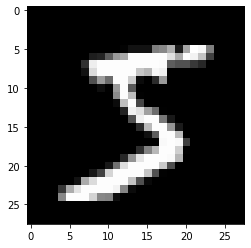

image is : 0


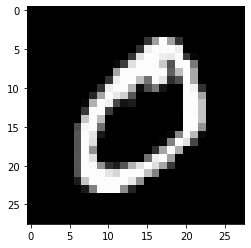

image is : 4


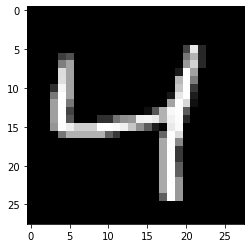

image is : 1


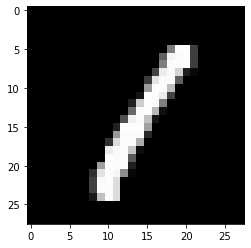

image is : 9


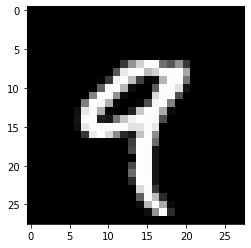

image is : 2


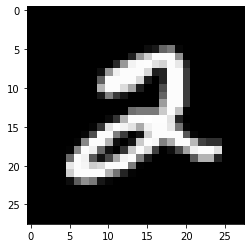

image is : 1


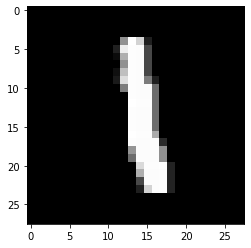

image is : 3


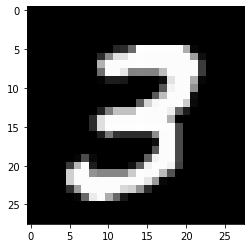

image is : 1


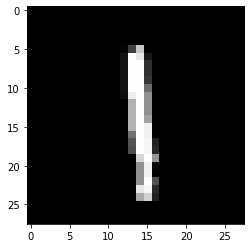

image is : 4


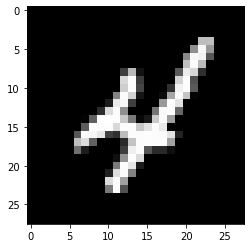

In [26]:
for i in range(10):
    plt.imshow(xtrain[i],cmap="gray")
    print("image is :",ytrain[i])
    plt.show()

In [27]:
xtrain=xtrain.reshape(60000,784)
xtest=xtest.reshape(10000,784)
# keras created layers only accept float data
xtrain=xtrain.astype("float32")
xtest=xtest.astype("float32")
xtrain=xtrain/255      # preprocessing
xtest=xtest/255
ytrain=np_utils.to_categorical(ytrain,10)
ytest=np_utils.to_categorical(ytest,10)

In [28]:
# autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


In [29]:
autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_18 (Dense)             (None, 784)               101136    
Total para

60000/60000 [==============================] - 7s 123us/step - loss: 0.1097 - acc: 0.8120 - val_loss: 0.1094 - val_acc: 0.8119
Epoch 51/100
60000/60000 [==============================] - 7s 118us/step - loss: 0.1093 - acc: 0.8120 - val_loss: 0.1074 - val_acc: 0.8106
Epoch 52/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.1090 - acc: 0.8121 - val_loss: 0.1107 - val_acc: 0.8102
Epoch 53/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.1088 - acc: 0.8121 - val_loss: 0.1067 - val_acc: 0.8121
Epoch 54/100
60000/60000 [==============================] - 7s 118us/step - loss: 0.1084 - acc: 0.8122 - val_loss: 0.1065 - val_acc: 0.8111
Epoch 55/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.1081 - acc: 0.8122 - val_loss: 0.1093 - val_acc: 0.8108
Epoch 56/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.1077 - acc: 0.8122 - val_loss: 0.1068 - val_acc: 0.8119
Epoch 57/100
60000/60000 [=======

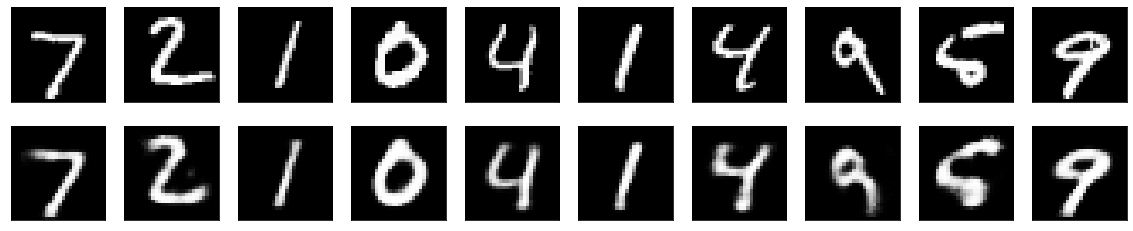

In [30]:
decoded_imgs=autoencoder.predict(xtest)
# printing
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()